1. Problem Statement : This dataset contains carsales by a car dealer from 1953 to 2016

Introduction : This is a Exploratory Data Analysis carried out on carsales database on variour variable to see their correlation and relationship with each other.

In [ ]:
2. Loading the required packages and data  

In [2]:
import numpy as np
import pandas as pdx
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

In [4]:
! pip install -q datascience
! pip install -q pandas-profiling
import pandas_profiling

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output

In [6]:
car_sales=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv",engine='python',encoding='latin-1')

3. Data Profiling on various aspect

In [7]:
car_sales.head()  # give details of first five rows in the whole dataset

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [8]:
car_sales.tail() # gives details of last five rows in the dataset

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


Data Observation :

->Summary of the various columns in this dataset
• car: (String Datatype) The company which manufactured the car. It has been noted that this column has high cardinality(87 distinct values)
• price (Int Datatype) The price for which the car was sold. There are 267 rows with the price as zero. Assumption done here is that these were given to charity. 
• body: (String Datatype) The body type of the car sold. Sedan seems to be the maximum occuring value.
• mileage: (Int Datatype) Number of miles that the car has been run for till now. The value in this column could be in thousand multiplers. There were some cars sold with mileage of zero indicating that the dealership sells new vehicles along with old ones. Also the outliers >900 are only 5 in number also there are other value surrounding it which inclines us more to think that these could not be outliers.
• engV: (Float Datatype) The engine volume. There are 434 null values in this column which i am thinking of replacing with the median of the data.
• engType: (String datatype) The fuel type consumed by the engine. This nominal value has only 4 distinct values petrol, gas, diesel and other. 
• registration: (boolean Datatype) Just Indicates whether the vehicle was registered or not. Doesn't seem to add much value to the data will be dropping this column.
• year: (int Datatype) The year in which the car was sold.Values range from 1953 to 2016.
• model: (String Datatype) The model name under the brand lister as car. We are going to drop this column as well as it has very high cardinality(888 unique values)
• drive: ( String Datatype) Drive type of the vehicle. Only 4 possible values. There are 511 missing values and we are thinking of replacing these values with the mode of the data as this is categorical data. 


In [10]:
car_sales.shape  # gives details of rows and columns in the dataset

(9576, 10)

Observation : Dataset have 10 columns and 9576 rows with various information about each type of cars.

In [11]:
car_sales.info()   # This will give information about Index, Datatype and memory used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


Observation :  We can see that all the variables except engV and drive have 9576 entries.This indicates some missing values in engV and drive variables.We need to check for the same

In [12]:
car_sales.describe()  # This will give missing values and other general statistical description of data

,price,mileage,engV,year
count,9576.000000,9576.000000,9142.000000,9576.000000
mean,15633.317316,138.862364,2.646344,2006.605994
std,24106.523436,98.629754,5.927699,7.067924
min,0.000000,0.000000,0.100000,1953.000000
25%,4999.000000,70.000000,1.600000,2004.000000
50%,9200.000000,128.000000,2.000000,2008.000000
75%,16700.000000,194.000000,2.500000,2012.000000
max,547800.000000,999.000000,99.990000,2016.000000


Observation : This table shows that the count of engV is not matching with others while the min value for price and mileage showing zero values which is not possible. Need to replace these value by NaN.

In [13]:
car_sales.isnull().sum() # This will count null for each column but will not count zeros(0) as null 

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

Observation : The table shows that engV and drive have maximum null values. We are not considering it as zeros but need to think, how to deal with this.

In [14]:
profile=pandas_profiling.ProfileReport(car_sales)                # This will generate html output for preprocessing
profile.to_file(output_file="car_sales_preprocessing1.html")

Preprofiling_1 :
car and model have "Other" values. We should treat them as NaN while variable like engVand drive have missing values. Price has 267 zeros and mileage has 348 zeros which we will be treated as missing values and replaced by NaN 

In [114]:
car_sales.replace({'engType':'Other','price':0,'mileage':0},np.nan,inplace=True)     # This will help to replace other values by NaN

In [23]:
profile=pandas_profiling.ProfileReport(car_sales)
profile.to_file(output_file="car_sales_preprofiling2.html")

Preprofiling_2 : Now we need to deal with missing and duplicate values
duplicate : there are 113 duplicate rows in dataset, we have to remove them first

4.Data Normalization - Missing data is taken care during analysis by mutation of various variables

In [17]:
car_sales.drop_duplicates(inplace=True)  # inplace used to modify the dataset
car_sales.shape

(9463, 10)

Handling the missing values for price column based on [car,model] group product and median value of price based on this group

In [37]:
def get_median_price(a):
    brand = a.name[0]
    if a.count() >0 :
        return a.median ()
    elif car_sales.groupby(['car'])['price'].count()[brand] >0:
        brand_median = car_sales.groupby(['car'])['price'].apply(lambda a:a.median ())[brand]
        return brand_median
    else:
        return car_sales['price'].median()

price_median=car_sales.groupby(['car','model'])['price'].apply(get_median_price).reset_index()
price_median.rename(columns={'price':'price_med'},inplace=True)
price_median.head()

,car,model,price_med
0,Acura,MDX,17200.0
1,Acura,RL,13950.0
2,Acura,TL,8699.0
3,Acura,TLX,38200.0
4,Acura,ZDX,30999.0


In [58]:
def fill_with_median(a):
    if pd.isnull(a['price']):
        return price_median[(price_median['car']== a['car']) & (price_median['model'] == a['model'])]['price_med'].values[0]
    else: 
        return a['price']
    
car_sales['price'] = car_sales.apply(fill_with_median,axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68.0,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173.0,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135.0,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162.0,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91.0,NaN,Other,yes,2013,E-Class,NaN


engV : Replacing the missing values now for engV column based on [car,model] group product and median value of engV based on this group.

In [63]:
def get_median_engV(a):
    brand = a.name[0]
    if a.count()>0:
        return a.median
    elif car_sales.groupby(['car'])['engV'].count()[brand]>0:
        brand_median = car_sales.groupby(['car'])['engV'].apply(lambda a :a.median())[brand]
        return brand_median
    else:
        return car_sales['engV'].median()
engV_median= car_sales.groupby(['car','model'])['engV'].apply(get_median_engV).reset_index()
engV_median.rename(columns={'engV':'engV_med'},inplace=True)
engV_median.head()

,car,model,engV_med
0,Acura,MDX,<bound method Series.median of 4484 3.7\n54...
1,Acura,RL,<bound method Series.median of 2198 3.5\n58...
2,Acura,TL,<bound method Series.median of 4803 3.2\n71...
3,Acura,TLX,<bound method Series.median of 8919 2.4\nNa...
4,Acura,ZDX,<bound method Series.median of 7683 3.7\nNa...


In [115]:
def fill_with_median(a):
    if pd.isnull(a['engV']):
        return engV_median[(engV_median['car']== a['car']) & (engV_median['model']==a['model'])]['engV_med'].values[0]
    else:
        return a['engV']   
car_sales['engV']=car_sales.apply(fill_with_median,axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,<bound method Series.median of 1 1.8\n4 ...,NaN,yes,2013,E-Class,rear


Mileage: Replacing missing values for mileage based on [car,model,year] group product and median value of mileage based on  this group. Year is the key indicators for mileage as year on year mileage gets reduce similarly it depends on brands also.

In [76]:
def get_median_mileage(a):
    brand=a.name[0]
    if a.count()>0:
        return a.median
    elif car_sales.groupby(['car'])['mileage'].count()[brand]>0:
        brand_median=car_sales.groupby(['car'])['mileage'].apply(lambda a:a.median())[brand]
        return brand_median
    else:
        return car_sales['mileage'].median()

mileage_median=car_sales.groupby(['car','model'])['mileage'].apply(get_median_mileage).reset_index()
mileage_median.rename(columns={'mileage': 'mileage_med'},inplace=True)
mileage_median.head()

,car,model,mileage_med
0,Acura,MDX,<bound method Series.median of 4484 170.0\n...
1,Acura,RL,<bound method Series.median of 2198 150.0\n...
2,Acura,TL,<bound method Series.median of 4803 144.0\n...
3,Acura,TLX,<bound method Series.median of 8919 4.0\nNa...
4,Acura,ZDX,<bound method Series.median of 7683 32.0\nN...


In [116]:
def fill_with_median(a):
    if pd.isnull(a['mileage']):
        return mileage_median[(mileage_median['car']==a['car']) & (mileage_median['model']==a['model'])]['mileage_med'].values[0]
    else:
        return a['mileage']
                 
car_sales['mileage']=car_sales.apply(fill_with_median,axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,<bound method Series.median of 1 1.8\n4 ...,NaN,yes,2013,E-Class,rear


Repalcing missing value for categorical variable Drive based on [car,model] group product and mode value of drive based on this group

In [91]:
def get_drive_mode(a):
    brand=a.name[0]
    if a.count() > 0:
        return a.mode()
    elif car_sales.groupby(['car'])['drive'].count()[brand]> 0:
        brand_mode=car_sales.groupby(['car'])['drive'].apply(lambda a:a.mode())[brand]
        return brand_mode
    else:
        return car_sales['drive'].mode()
    
drive_modes=car_sales.groupby(['car','model'])['drive'].apply(get_drive_mode).reset_index().drop('level_2',axis=1)
drive_modes.rename(columns={'drive':'drive_mode'},inplace=True)
drive_modes.head()                                                                                                

,car,model,drive_mode
0,Acura,MDX,full
1,Acura,RL,full
2,Acura,TL,front
3,Acura,TLX,front
4,Acura,ZDX,full


In [117]:
def fill_with_mode(a):
    if pd.isnull(a['drive']):
        return drive_modes[(drive_modes['car']==a['car']) & (drive_modes['model']==a['model'])]['drive_mode'].values[0]
    else:
        return a['drive']
    
car_sales['drive']=car_sales.apply(fill_with_mode,axis=1)
car_sales.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,<bound method Series.median of 1 1.8\n4 ...,NaN,yes,2013,E-Class,rear


In [93]:
car_sales.isnull().sum()

car             0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
model           0
drive           0
dtype: int64

In [94]:
import pandas_profiling
profile=pandas_profiling.ProfileReport(car_sales)
profile.to_file(output_file='car_sales_postprofiling.html')

EXPLORATORY DATA ANALYSIS ON VARIOUS COMPOENNTS AND PROBLEM STATEMENT

In [6]:
car_sales.describe =()

NameError: name 'car_sales' is not defined

Text(0.5, 1.0, 'Top Ten Car Brands On Sale')

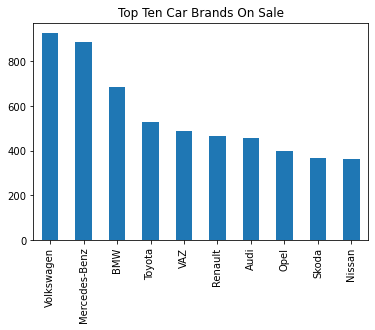

In [95]:
car_sales.car.value_counts().head(10).plot.bar()
plt.title("Top Ten Car Brands On Sale")

Plot Bar shows that Volkswagen and Mercedes-Benz are the top most brands on sale and these would be preferrable by high profile people.

In [118]:
car_sales[car_sales.price.isin(car_sales.price.nsmallest())].sort_values(['car','model','body','mileage','price'])

,car,price,body,mileage,engV,engType,registration,year,model,drive
5010,GAZ,259.350,sedan,1,2.4,NaN,yes,1959,21,rear
6457,Moskvich-AZLK,280.000,sedan,99,1.5,Petrol,yes,1976,2140,rear
7566,Moskvich-AZLK,350.000,sedan,100,<bound method Series.median of 6457 1.5\n6...,NaN,yes,1985,2140,rear
4905,VAZ,389.025,vagon,1,1.3,Petrol,yes,1983,2102,rear
8252,ZAZ,370.500,sedan,3,1.1,Petrol,yes,1989,968,rear


This table gives top 5 lowest price selling cars and their models along with body type. We can conclude that these cars can be used by low to middle profile income group people .

Text(0.5, 1.0, 'Most preferred engType used over the years')

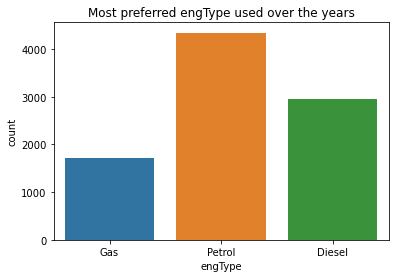

In [119]:
sns.countplot(x='engType',data=car_sales,orient='h')
plt.title("Most preferred engType used over the years")

The graph shows that car users prefered petrol engType as their first preference followed by diesel cars.

Text(0.5, 1.0, 'year-price lineplot(2010-2016)')

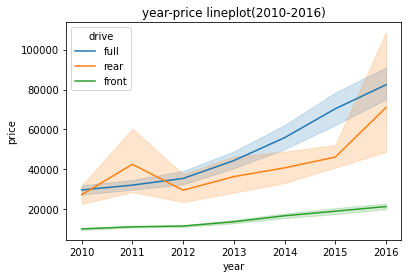

In [124]:
sns.lineplot(data=car_sales[car_sales.year >=2010],y='price',x='year',hue='drive')
plt.title("year-price lineplot(2010-2016)")

In [ ]:
sns.lineplot(y='year',x='mileage',data=car_sales,hue='engType')
plt.title("price - mileage line plot")

Text(0.5, 1.0, 'Heatmap for Highest Correlated features for Carsale Dataset')

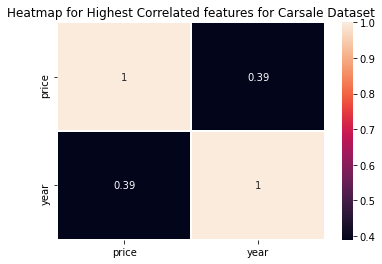

In [143]:
sns.heatmap(car_sales.corr(),annot=True,linewidth=.5)
plt.title("Heatmap for Highest Correlated features for Carsale Dataset")

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price distribution over the years with respect to engType')

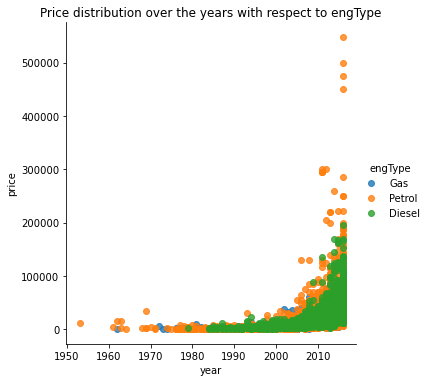

In [145]:
sns.lmplot('year','price',car_sales,fit_reg=False,hue='engType')
plt.title("Price distribution over the years with respect to engType")

Multivariate graph shows increasing trend of price in Petrol engType cars as compared to Diesel and Gas type

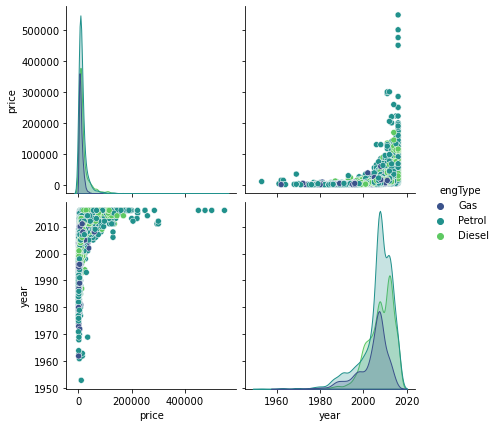

In [147]:
sns.pairplot(car_sales,hue='engType',palette='viridis',height=3)

The pairplot also shows the price varying based on year on year and type of demand increase in 'Petrol'engType vehicles . The vehicles prices is also depends on mileage.

Conclusion :

Withthe help of Jupyter Notebook we get to know how to conduct EDA with use of pandas plotting.

We have also used the matplolib and seaborn to develop better insights from the given data.

we have to come across various aspect of preprocessing of data before conduct actual analysis and interpretation of given dataset.
We can also used pandas profiling feature for generating html report of all datasets variables
We have checked the impact of one variable to another like model vs price, model vs mileage etc.,